In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression,HuberRegressor,PassiveAggressiveRegressor,SGDClassifier
from sklearn import metrics
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor
from sklearn.model_selection import KFold,cross_validate
from sklearn.tree import DecisionTreeClassifier
import time
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import Image
import sklearn

## Method-1 
(Data directly taken from preprocessed dataset)

### Reading Data

In [2]:
data=pd.read_csv('/Users/shwethailango/Documents/Work/Solarillion/Flight_delay_pred/Data/data_processed/flight_delay_pred.csv')
data2=data.drop(columns=['Unnamed: 0','DayofMonth.1'],axis=1)


In [3]:
# Filtering delayed data
df1=data2[data2.ArrDel15==1]


In [4]:
df1.shape

(388058, 29)

### Assigning Dependent and Independant variables

In [94]:
f_imp=['DepDelayMinutes', 'DepTime', 'CRSDepTime', 'time', 'DestAirportID', 'OriginAirportID','Year',
       'weatherCode', 'pressure', 'winddirDegree', 'WindGustKmph','cloudcover','precipMM',
       'windspeedKmph', 'WindChillF', 'DewPointF', 'humidity','tempF','WindChillF','DayofMonth','Quarter','Month']

In [39]:
x=np.array(df1[f_imp])
y=np.array(df1['ArrDelayMinutes'])

### Splitting test and train datasets

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.20)

### Function for training Regression Models 

In [9]:
def train_model(x,y,model):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.33)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    return ypred,ytest
    

### 1.LinearRegression

In [20]:
model=LinearRegression()
yp1,ytest1=train_model(x,y,LinearRegression())
print("Mean Abs Error: ",metrics.mean_absolute_error(ytest1, yp1))
print("Mean Sqrd Erro: ",metrics.mean_squared_error(ytest1,yp1))
print("R2 score: ",metrics.r2_score(ytest1,yp1))
print("Intercept: ",model.intercept_)
print("Coef: \n",model.coef_)

Mean Abs Error:  14.646499616083775
Mean Sqrd Erro:  400.4738842094675
R2 score:  0.9213944337515717
Intercept:  [136.88367938]
Coef: 
 [[ 9.18852200e-01 -8.45245644e-04 -4.45238207e-03  1.29637730e-03
   5.90546325e-04 -1.84603591e-04  1.31044393e-02 -1.27164485e-01
  -3.21430755e-03  3.82682133e-02  1.25081472e-02 -9.44438365e-02
   4.30442939e-02 -2.10169214e-02  1.76951300e-01 -9.44438365e-02
  -1.23146689e-02 -3.28572380e-01  1.05587931e-01]]


### 2.ExtraTreesRegressor

In [26]:
yp2,ytest2=train_model(x,y,ExtraTreesRegressor())
print("Mean Abs Error: ",metrics.mean_absolute_error(ytest2, yp2))
print("Mean Sqrd Error: ",metrics.mean_squared_error(ytest2,yp2))
print("R2 score: ",metrics.r2_score(ytest2,yp2))

Mean Abs Error:  12.034801108855225
Mean Sqrd Error:  294.4026007742464
R2 score:  0.942214251537148


### 3.GradientBoostingRegressor

In [43]:
yp4,ytest4=train_model(x,y,GradientBoostingRegressor())
print("Mean Abs Error: ",metrics.mean_absolute_error(ytest4, yp4))
print("Mean Sqrd Error: ",metrics.mean_squared_error(ytest4,yp4))
print("R2 score: ",metrics.r2_score(ytest4,yp4))

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Abs Error:  11.763556128194695
Mean Sqrd Error:  292.33729697118525
R2 score:  0.9426196322156787


### 4.RandomForestRegressor

In [34]:
yp3,ytest3=train_model(x,y,RandomForestRegressor())
print("Mean Abs Error: ",metrics.mean_absolute_error(ytest3, yp3))
print("Mean Sqrd Error: ",metrics.mean_squared_error(ytest3,yp3))
print("R2 score: ",metrics.r2_score(ytest3,yp3))

Mean Abs Error:  11.908424364881046
Mean Sqrd Error:  288.7709727335843
R2 score:  0.9433196352550166


### -------

### Method-2 
(Data taken from Classifier Model (classification.ipynb))

#### Reading Data and modelling with best classifier

In [116]:
df2=data.drop(columns=['FlightDate', 'airport','Unnamed: 0','DayofMonth.1'],axis=1)

In [118]:
df2.shape

(1851436, 27)

Splitting test and train sets

In [119]:
x_=df2
y_=df2['ArrDel15']

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x_,y_,random_state=42,test_size=0.20)

Extracting test datasets into a new dataframe-df01

In [123]:
df01=pd.DataFrame(xtest)

In [144]:
df01.head()

,time,DayofMonth,Quarter,Month,Year,OriginAirportID,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,tempF,WindChillF,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree,delay01
1778209,2000,6,2,6,2016,11618,1935,1929.0,0.0,0.0,...,81,80,0.0,59,49,15,10,22,218,0.0
737512,1400,10,2,4,2017,12892,1345,1339.0,0.0,0.0,...,64,66,0.0,46,49,18,10,20,220,0.0
36012,1700,20,4,12,2017,13930,1715,1715.0,0.0,0.0,...,30,24,0.0,22,70,14,10,15,54,0.0
1079740,1100,31,1,3,2016,11292,1105,1143.0,38.0,1.0,...,37,29,1.1,31,79,21,7,25,110,1.0
1093872,800,20,1,3,2016,14107,810,844.0,34.0,1.0,...,66,67,0.0,29,31,7,10,12,71,1.0


In [ ]:
fimp=['DepDelayMinutes', 'DepTime', 'CRSDepTime', 'time', 'DestAirportID', 'OriginAirportID','DayofMonth','Quarter','Month'
       ,'weatherCode', 'pressure', 'winddirDegree', 'WindGustKmph',
       'windspeedKmph', 'WindChillF', 'DewPointF', 'humidity','tempF']

Dependant and independant variable(only selected features(fimp) are used taken) 

In [124]:
xtrain1,xtest1=xtrain[fimp],xtest[fimp]

#### RandomForest-SMOTETomek(choosing best classifier)

In [7]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_os,y_os=smk.fit_sample(xtrain1,ytrain1)

In [8]:
rfc=RandomForestClassifier()
rfc.fit(x_os,y_os)
ypred5=rfc.predict(xtest1)

In [152]:
print("Confusion matrix")
print(metrics.confusion_matrix(ytest, ypred5))
print(metrics.classification_report(ytest, ypred5))

Confusion matrix
[[282548  10074]
 [ 21219  56447]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    292622
         1.0       0.85      0.73      0.78     77666

    accuracy                           0.92    370288
   macro avg       0.89      0.85      0.87    370288
weighted avg       0.91      0.92      0.91    370288




Assigning predicted value(delay or not) to the dataset as new column

In [127]:
df01['delay01']=rfc.predict(xtest1)

In [128]:
df01.shape

(370288, 28)

Extracting only delayed data (delay=1) to predict the Arrival delay period 

In [129]:
df02=df01[df01.delay01==1]

In [130]:
df02.shape

(66521, 28)

In [131]:
df02.columns

Index(['time', 'DayofMonth', 'Quarter', 'Month', 'Year', 'OriginAirportID',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'DestAirportID',
       'CRSArrTime', 'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'weatherCode',
       'pressure', 'cloudcover', 'tempF', 'WindChillF', 'precipMM',
       'DewPointF', 'humidity', 'windspeedKmph', 'visibility', 'WindGustKmph',
       'winddirDegree', 'delay01'],
      dtype='object')

In [133]:
df02.to_csv('/Users/shwethailango/Documents/Work/Solarillion/Flight_delay_pred/Data/Flight_Delay_pred/reg/filtered02.csv')

####  Assigning target variable and Splitting test and train datasets

In [134]:
x1=np.array(df02[f_imp])
y1=np.array(df02['ArrDelayMinutes'])

In [135]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.20)

In [136]:
x1_train.shape

(53216, 18)

In [ ]:
#df3.to_csv('/Users/shwethailango/Documents/Work/Solarillion/Flight_delay_pred/Data/Flight_Delay_pred/reg/filtered.csv')

###  Training model, prediction and cross-validation

##### List of Regressors 
(new models can be included)


In [221]:
def regressors():
    models=[]
    models.append(('LR'   , LinearRegression()))
    models.append(('ETR'  , ExtraTreesRegressor()))
    models.append(('GBR'  , GradientBoostingRegressor()))
    models.append(('RFR' , RandomForestRegressor()))
    return models

##### Cross_val
(Modeling and predicting with same set of data may not be a good measure for performance metrics, so cross validation is done to check whether accuracy is convinving or not )
Here it is done using kfold


In [220]:
SEED = 7
np.random.seed(SEED)

def cross_val1(x_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = ['neg_root_mean_squared_error','neg_mean_absolute_error','r2']

    results = []
    regs = []
    for i,j in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_validate(j, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results['test_r2'])
        regs.append(i)
        msg = "%s->\n RMSE: %f , MAE: %f " % (i, abs(cv_results['test_neg_root_mean_squared_error'].mean()),
                                          abs(cv_results['test_neg_mean_absolute_error'].mean()))
        print(msg)
    
        
    return regs,results

##### Visualization with box plot
(Box plot is used to visualize the distribution of values(cv_results) of "cross validated scores".<br> 
 It gives 5 number summary: minimum,25th percentile,median,75th percentile,maximum)

In [235]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,regs,results):
        
        data = []

        for i in range(len(regs)):
            data.append(self.__Trace(regs[i],results[i]))


        py.iplot(data)

##### Implementation

In [223]:
models = regressors()
names,results = cross_val1(x1_train, y1_train,models)


/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



LR->
 RMSE: 18.509850 , MAE: 13.108775 


/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



ETR->
 RMSE: 18.860143 , MAE: 13.361767 


/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



GBR->
 RMSE: 18.415498 , MAE: 12.817938 


/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



RFR->
 RMSE: 18.769329 , MAE: 13.213191 


In [237]:
PlotBoxR().PlotResult(names,results)

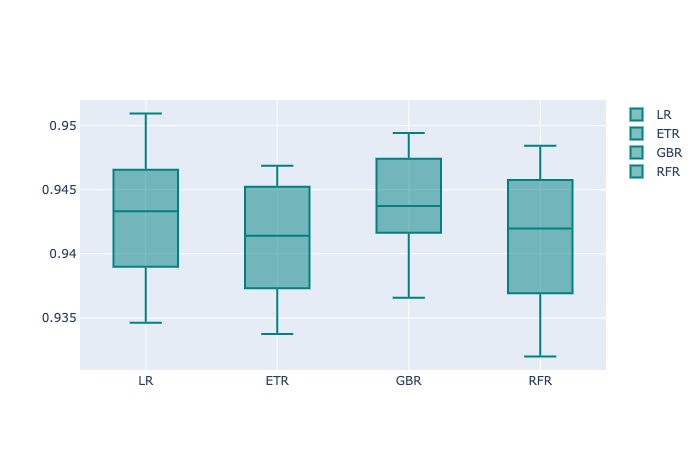

In [143]:
Image(filename='/Users/shwethailango/Downloads/newplot (2).png') 

#####  Voting Regressor

In [145]:
r1 = GradientBoostingRegressor()
r2 = HuberRegressor(epsilon=1.65)
r3 = PassiveAggressiveRegressor(random_state=0)

In [146]:
vreg = VotingRegressor([('grb', r1), ('hub', r2),('par',r3)])

In [147]:
yp_f = vreg.fit(x1_train, y1_train).predict(x1_test)

/Users/shwethailango/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [148]:
print("Mean Abs Error: ",metrics.mean_absolute_error(y1_test, yp_f))
print("Mean Sqrd Error: ",metrics.mean_squared_error(y1_test,yp_f))
print("R2 score: ",metrics.r2_score(y1_test,yp_f))

Mean Abs Error:  14.066285318813717
Mean Sqrd Error:  366.30678928530267
R2 score:  0.9411515933297818
